# <center>Mushroom Kaggle Project for UTA Data Science 4380<center>

## <center>Introduction<center>

This is my ML attempt on the Mushroom data set here: https://www.kaggle.com/datasets/uciml/mushroom-classification

The purpose of this data set is to classify mushrooms into 2 categories based on thier physical characteristics: poisonous and edible. 
so far we have given:
### Attribute Information:

**classes**: edible=e, poisonous=p

**cap-shape**: bell=b, conical=c,convex=x, flat=f, knobbed=k,sunken=s

**cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s

**cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

**bruises**: bruises=t, no=f

**odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

**gill-attachment**: attached=a, descending=d, free=f, notched=n

**gill-spacing**: close=c, crowded=w, distant=d

**gill-size**: broad=b, narrow=n

**gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

**stalk-shape**: enlarging=e, tapering=t

**stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

**stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s

**stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s

**stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

**stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

**veil-type**: partial=p, universal=u

**veil-color**: brown=n, orange=o, white=w, yellow=y

**ring-number**: none=n, one=o, two=t

**ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, endant=p, sheathing=s, zone=z

**spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

**population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

**habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

With this information, let us do a couple of preliminary steps before we mess with the data:

-  Import all the modules we need.
- View the data and see how its organized
- See how much missing data there is.

In [1]:
#Importing modules here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import keras as keras
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

2024-07-26 23:27:10.475559: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 23:27:10.483184: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 23:27:10.621399: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 23:27:10.623092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 23:27:12.229055: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In the import modules we import pandas, matplotlib, numpy, math, and random to help us with the math and logitstics for the data while xgboost, sklearn, scipy, and keras will be used for our models later on.

In [2]:
#Opening data set and saving to a data frame here
df = pd.read_csv("mushrooms.csv")

In [3]:
#Doing preliminary data analysis here
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From the data set we see the how many unique letters there are which will help us when we encode them, and we see the frequence of how often the letter that appears the most occurs.

In [4]:
#Checking for null/missing values here
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

From this we see that there is no missing data, thus skipping most data cleaning steps of preproccessing.

## <center>Preprocessing<center>

For our first preprocessing step we need to one hot encode all the data into numbers rather than letters, so that when we use our models, we can perform mathematical operations and predict/classify operations using our models. By using .get_dummies() we can easily transform the entire dataset into boolean True/False and thus can be used in math as shown below.

In [5]:
#Applying one-hot encoding to the entire dataset
df_encoded = pd.get_dummies(df, prefix_sep='_')

#Save the transformed dataset if desired
df_encoded.to_csv('one_hot_encoded_dataset.csv', index=False)

#Print the first few rows to verify
print(df_encoded.head())

   class_e  class_p  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0    False     True        False        False        False        False   
1     True    False        False        False        False        False   
2     True    False         True        False        False        False   
3    False     True        False        False        False        False   
4     True    False        False        False        False        False   

   cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  ...  population_s  \
0        False         True          False          False  ...          True   
1        False         True          False          False  ...         False   
2        False        False          False          False  ...         False   
3        False         True          False          False  ...          True   
4        False         True          False          False  ...         False   

   population_v  population_y  habitat_d  habitat_g  habitat_l  habi

## <center>Modeling<center>

Now that our numbers are properly encoded, lets run a simple logistical regression model since it works best for classification problems to get a feel of the data set.

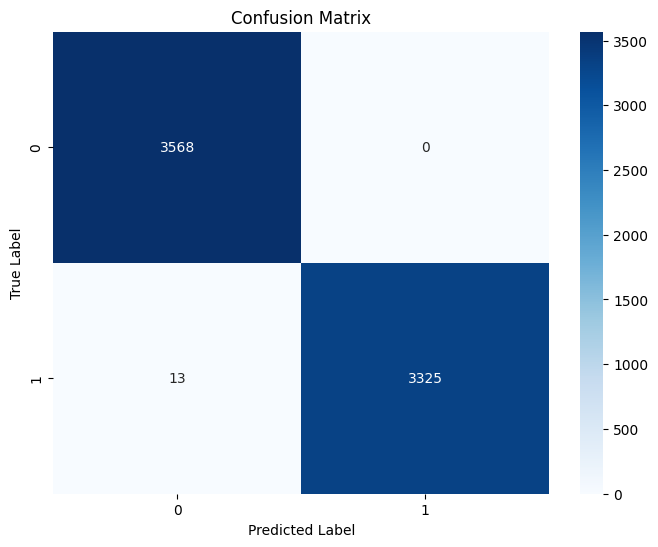

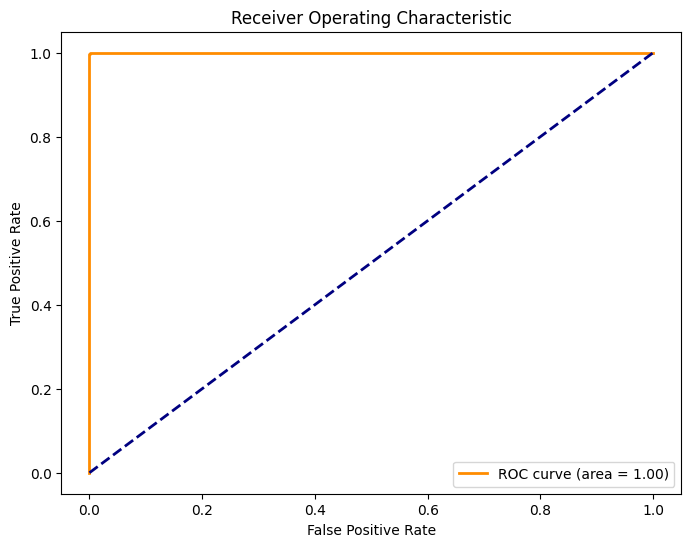

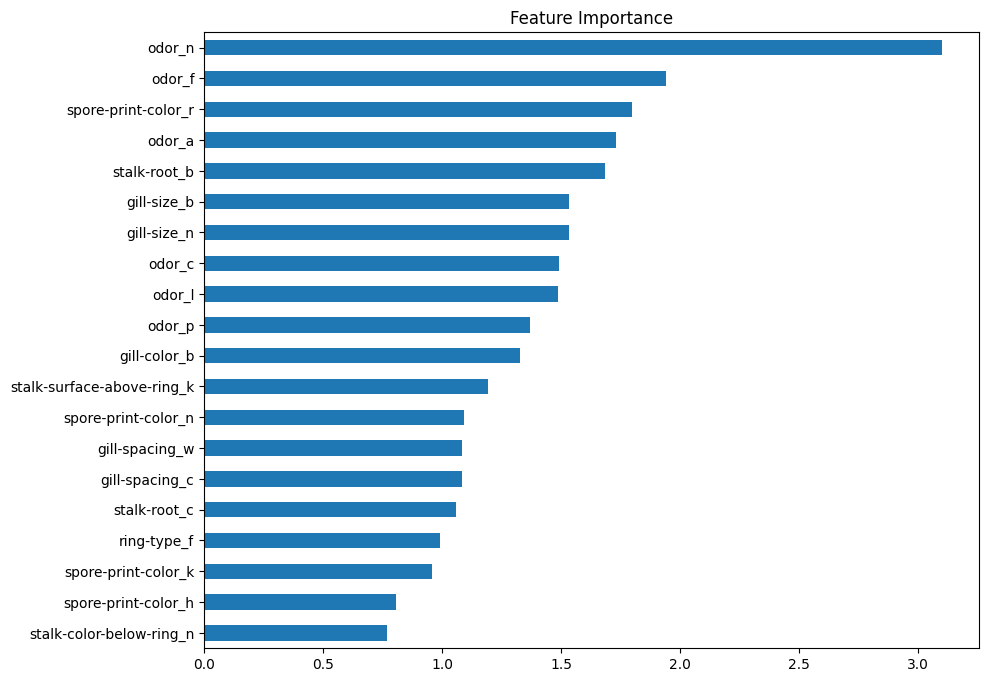

Confusion Matrix:
[[3568    0]
 [  13 3325]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3568
        True       1.00      1.00      1.00      3338

    accuracy                           1.00      6906
   macro avg       1.00      1.00      1.00      6906
weighted avg       1.00      1.00      1.00      6906



In [6]:
df = pd.read_csv('one_hot_encoded_dataset.csv')

X = df.drop(['class_p', 'class_e'], axis=1, errors='ignore')
y = df['class_p']  # Ensure this is the correct target variable

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

#Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Model prediction
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Feature Importance
feature_importance = pd.Series(index = X.columns, data = np.abs(model.coef_[0]))
feature_importance.nlargest(20).sort_values().plot(kind = 'barh', figsize=(10,8))
plt.title('Feature Importance')
plt.show()

#Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

From the model we can see that there is something perculiar going on, with only 15% of the data being needed to predict 85% of the data at 100% accuracy, that means the data given can easily be classified with a decision tree, especially due to the feature importance showing us which features had the most/least weight in determining edibility. We can verify this through a number of different ways, but first let us verify by checking how important are these features.

In [7]:
df = pd.read_csv('one_hot_encoded_dataset.csv')

df_poisonous = df[df['class_p'] == True]
dfp = df_poisonous.drop(['class_e'], axis = 1)

By calculating the ratios of occurences of features of mushrooms that are poisonous over how many times those features show up overall, we can see the importance of a feature is to determine edibility. Where 100%, or 1.0000, means the feature always mean poisonous, or 0%, 0r 0.0000, means that the feature always means edibility. From this we can construct a rudimentary decision tree.

In [8]:
pd.set_option('display.max_rows', None)

# Calculate the total occurrences of each feature in the original dataframe
total_counts = df.sum()

# Calculate the occurrences of each feature in the dfp dataframe
dfp_counts = dfp.sum()

# Calculate the ratio of dfp counts to total counts
ratios = dfp_counts / total_counts

# Sort the ratios from highest to lowest
sorted_ratios = ratios.sort_values(ascending=False)

# Display the sorted ratios
print(sorted_ratios)


odor_s                        1.000000
stalk-color-below-ring_y      1.000000
stalk-color-above-ring_b      1.000000
gill-color_r                  1.000000
stalk-color-above-ring_c      1.000000
stalk-color-above-ring_y      1.000000
odor_p                        1.000000
stalk-color-below-ring_b      1.000000
gill-color_b                  1.000000
ring-type_n                   1.000000
stalk-color-below-ring_c      1.000000
class_p                       1.000000
ring-type_l                   1.000000
cap-surface_g                 1.000000
spore-print-color_r           1.000000
odor_f                        1.000000
odor_y                        1.000000
cap-shape_c                   1.000000
veil-color_y                  1.000000
odor_m                        1.000000
ring-number_n                 1.000000
odor_c                        1.000000
spore-print-color_h           0.970588
stalk-color-above-ring_n      0.964286
stalk-surface-above-ring_k    0.939292
stalk-surface-below-ring_

Now we can make a rudimentary decision tree using if-elif-else statements.

In [9]:
def decision_tree(row):
    if row['odor_s']:
        return "Poisonous"
    elif row['stalk-color-below-ring_y']:
        return "Poisonous"
    elif row['stalk-color-above-ring_b']:
        return "Poisonous"
    elif row['gill-color_r']:
        return "Poisonous"
    elif row['stalk-color-above-ring_c']:
        return "Poisonous"
    elif row['stalk-color-above-ring_y']:
        return "Poisonous"
    elif row['odor_p']:
        return "Poisonous"
    elif row['stalk-color-below-ring_b']:
        return "Poisonous"
    elif row['gill-color_b']:
        return "Poisonous"
    elif row['ring-type_n']:
        return "Poisonous"
    elif row['stalk-color-below-ring_c']:
        return "Poisonous"
    elif row['class_p']:  # Ensure this is correctly referenced; this seems like a target label you might want to exclude
        return "Poisonous"
    elif row['ring-type_l']:
        return "Poisonous"
    elif row['cap-surface_g']:
        return "Poisonous"
    elif row['spore-print-color_r']:
        return "Poisonous"
    elif row['odor_f']:
        return "Poisonous"
    elif row['odor_y']:
        return "Poisonous"
    elif row['cap-shape_c']:
        return "Poisonous"
    elif row['veil-color_y']:
        return "Poisonous"
    elif row['odor_m']:
        return "Poisonous"
    elif row['ring-number_n']:
        return "Poisonous"
    elif row['odor_c']:
        return "Poisonous"
    elif row['stalk-color-below-ring_o']:
        return "Edible"
    elif row['stalk-color-below-ring_g']:
        return "Edible"
    elif row['population_a']:
        return "Edible"
    elif row['odor_a']:
        return "Edible"
    elif row['veil-color_o']:
        return "Edible"
    elif row['veil-color_n']:
        return "Edible"
    elif row['habitat_w']:
        return "Edible"
    elif row['ring-type_f']:
        return "Edible"
    elif row['spore-print-color_b']:
        return "Edible"
    elif row['spore-print-color_o']:
        return "Edible"
    elif row['spore-print-color_u']:
        return "Edible"
    elif row['spore-print-color_y']:
        return "Edible"
    elif row['cap-color_r']:
        return "Edible"
    elif row['stalk-color-above-ring_e']:
        return "Edible"
    elif row['stalk-color-above-ring_g']:
        return "Edible"
    elif row['cap-color_u']:
        return "Edible"
    elif row['stalk-root_r']:
        return "Edible"
    elif row['gill-color_o']:
        return "Edible"
    elif row['stalk-color-above-ring_o']:
        return "Edible"
    elif row['odor_l']:
        return "Edible"
    elif row['gill-color_e']:
        return "Edible"
    elif row['cap-shape_s']:
        return "Edible"
    elif row['stalk-color-below-ring_e']:
        return "Edible"
    elif row['population_n']:
        return "Edible"
    else:
        return "Unknown"

# Load the dataset
df = pd.read_csv('one_hot_encoded_dataset.csv')
df = df.astype(int)

# Apply the decision_tree function to each row
df['Classification'] = df.apply(decision_tree, axis=1)

# Print the number of each classification
print(df['Classification'].value_counts())


Classification
Poisonous    3916
Edible       2752
Unknown      1456
Name: count, dtype: int64


Now since this imperfect due to the unknowns, we need something a bit better to get a 100% classification instead of 1456 unknowns.

Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



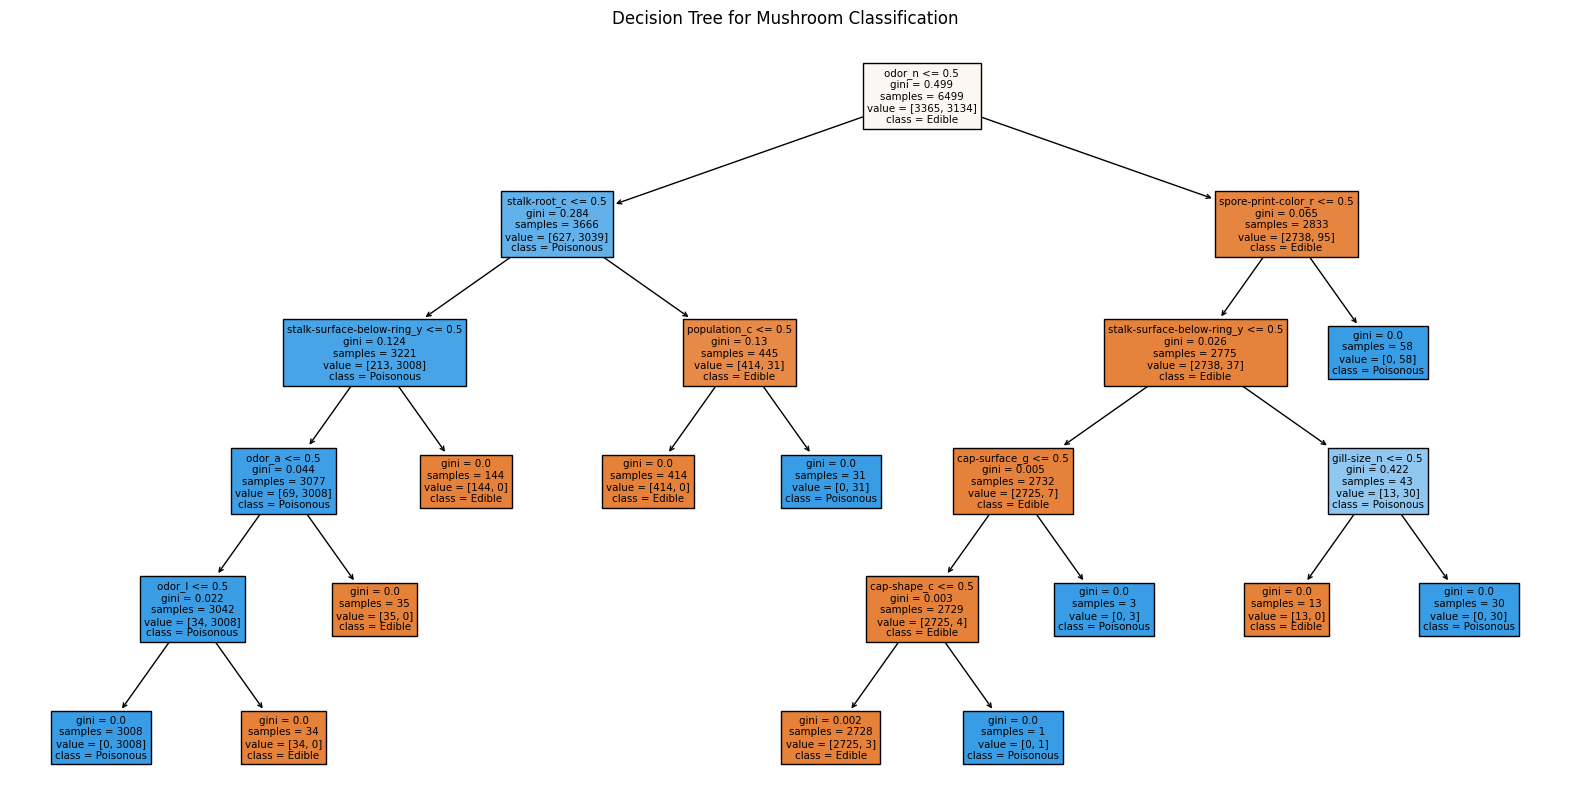

In [10]:
# Load and prepare the dataset
df = pd.read_csv('path_to_your_one_hot_encoded_dataset.csv')
df = df.astype(int)

# Define the features and the target
X = df.drop(['class_p', 'class_e'], axis=1, errors='ignore')
y = df['class_p']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Edible', 'Poisonous'])
plt.title('Decision Tree for Mushroom Classification')
plt.show()


As we can see, a more complex tree leads to a better result with again 100% accuracy.